In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification,make_blobs
from matplotlib.colors import ListedColormap
cmap_bold=ListedColormap(['#FFFF00','#00FF00','#0000FF','#000000'])

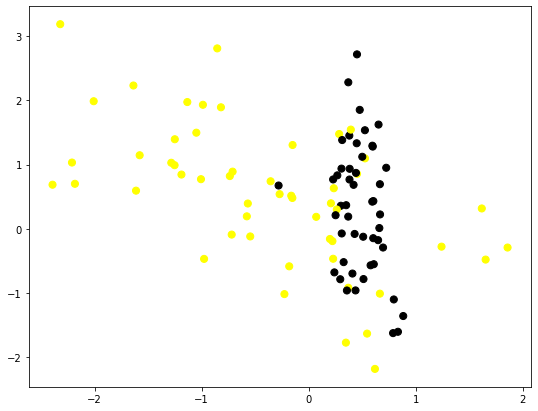

In [2]:
X_c1,y_c1=make_classification(n_samples=100,n_features=2,n_classes=2,n_informative=2,
                              n_redundant=0,random_state=0,n_clusters_per_class=1,flip_y=0.1,class_sep=0.5)
plt.figure(figsize=(9,7))
plt.scatter(X_c1[:,0],X_c1[:,1],c=y_c1,cmap=cmap_bold,marker='o',s=50)
plt.show()

# Naive Bayes classifier

In [3]:
X_train,X_test,y_train,y_test=train_test_split(X_c1,y_c1,random_state=0)

In [4]:
from sklearn.naive_bayes import GaussianNB
nbclf=GaussianNB()
nbclf.fit(X_train,y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [5]:
nbclf.score(X_train,y_train)

0.84

In [6]:
nbclf.score(X_test,y_test)

0.84

In [7]:
cancer=load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
X,y=cancer.data,cancer.target
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [9]:
nbclf=GaussianNB()
nbclf.fit(X_train,y_train)
print("accuracy : ", nbclf.score(X_test,y_test))
print("confusion matrix \n",confusion_matrix(y_test,nbclf.predict(X_test)))


accuracy :  0.9370629370629371
confusion matrix 
 [[48  5]
 [ 4 86]]


In [10]:
from sklearn.ensemble import RandomForestClassifier
forest_model=RandomForestClassifier(random_state=0)
forest_model.fit(X_train,y_train)
print('accuracy : ',forest_model.score(X_test,y_test))
print('confusion_matrix \n',confusion_matrix(y_test,forest_model.predict(X_test)))

accuracy :  0.972027972027972
confusion_matrix 
 [[52  1]
 [ 3 87]]


In [11]:
forest_model=RandomForestClassifier(n_estimators=21,max_features=8,max_depth=10,random_state=0)
forest_model.fit(X_train,y_train)
print('accuracy : ',forest_model.score(X_test,y_test))
print('confusion_matrix \n',confusion_matrix(y_test,forest_model.predict(X_test)))

accuracy :  0.986013986013986
confusion_matrix 
 [[52  1]
 [ 1 89]]


In [12]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(max_features=8,learning_rate=0.1,max_depth=10,random_state=0)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=10,
                           max_features=8, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [13]:
print('accuracy : ',gbc.score(X_test,y_test))
print('confusion matrix \n',confusion_matrix(y_test,gbc.predict(X_test)))

accuracy :  0.972027972027972
confusion matrix 
 [[52  1]
 [ 3 87]]


# Neural Networks

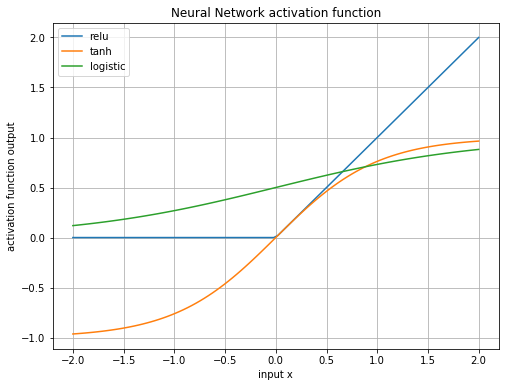

In [14]:
plt.figure(figsize=(8,6))
plt.grid()
plt.title('Neural Network activation function')
xrange=np.linspace(-2,2,100)
plt.plot(xrange,np.maximum(xrange,0),label='relu')
plt.plot(xrange,np.tanh(xrange),label='tanh')
plt.plot(xrange,1/(1+np.exp(-xrange)),label='logistic')
plt.legend(loc='best')
plt.xlabel('input x')
plt.ylabel('activation function output')
plt.show()

In [15]:
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

mlp_clf=MLPClassifier(hidden_layer_sizes=[10,10],alpha=5.0,random_state=0,activation='relu',
                     solver='lbfgs')
mlp_clf.fit(X_train_scaled,y_train)
print('train_accuracy : ',mlp_clf.score(X_train_scaled,y_train))
print('test_accuracy : ',mlp_clf.score(X_test_scaled,y_test))
print('test set confusion matrix \n ',confusion_matrix(y_test,mlp_clf.predict(X_test_scaled)))



train_accuracy :  0.9835680751173709
test_accuracy :  0.965034965034965
test set confusion matrix 
  [[49  4]
 [ 1 89]]


# Unsupervised Learning

In [16]:
from sklearn.preprocessing import StandardScaler # convert data to zero mean and unit variance
from sklearn.decomposition import PCA
X,y=cancer.data,cancer.target
stdscaler=StandardScaler()
X_normalized=stdscaler.fit_transform(X)
pca=PCA(n_components=2)
pca.fit(X_normalized)
X_pca=pca.transform(X_normalized)
print(X.shape)
print(X_pca.shape)

(569, 30)
(569, 2)


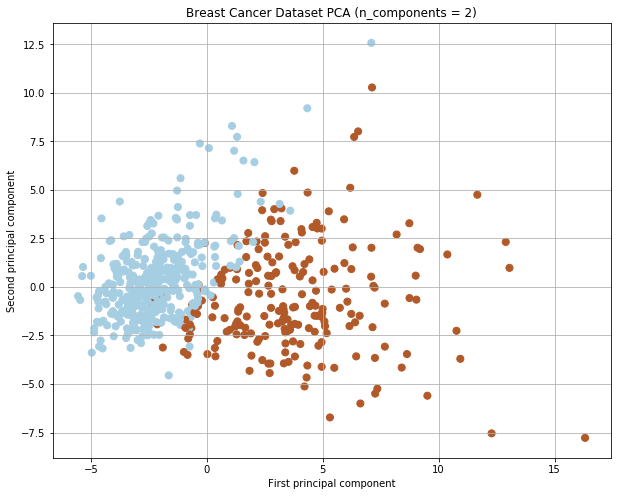

In [17]:
plt.figure(figsize=(10,8))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y,cmap='Paired_r',s=50,marker='o')
plt.grid()
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Breast Cancer Dataset PCA (n_components = 2)')
plt.show()

In [18]:
X_pca.shape

(569, 2)

In [19]:
y.shape

(569,)

In [20]:
pca_and_X_normalize=np.append(X_pca,X_normalized,axis=1)
pca_and_X_normalize.shape

(569, 32)

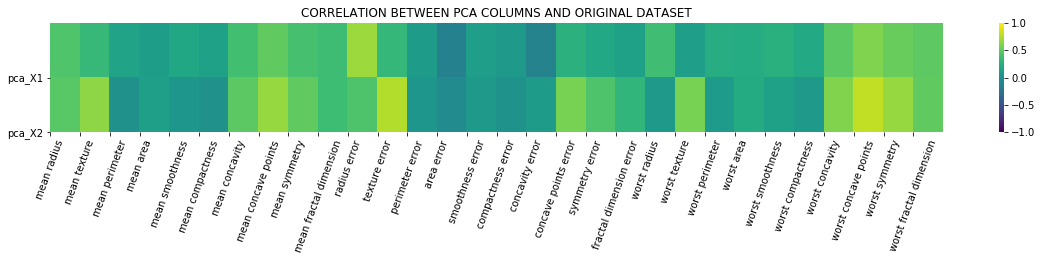

In [21]:
import seaborn as sns
plt.figure(figsize=(20,2))
plt.title('CORRELATION BETWEEN PCA COLUMNS AND ORIGINAL DATASET')

sns.heatmap(pd.DataFrame(pca_and_X_normalize).corr().iloc[30:,:30],vmin=-1,vmax=1,cmap='viridis')
xticks=plt.xticks([i for i in range(30)],cancer.feature_names,rotation=70)
yticks=plt.yticks([1,2],['pca_X1','pca_X2'],rotation=0)

In [22]:
from sklearn.manifold import MDS     # Multi-Dimension Scaling
mds=MDS(n_components=2)
X_mds=mds.fit_transform(X_normalized)
print(X.shape)
print(X_pca.shape)

(569, 30)
(569, 2)


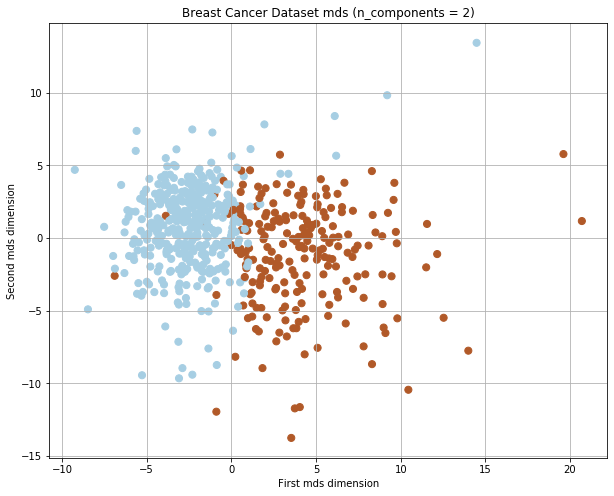

In [23]:
plt.figure(figsize=(10,8))
plt.scatter(X_mds[:,0],X_mds[:,1],c=y,cmap='Paired_r',s=50,marker='o')
plt.grid()
plt.xlabel('First mds dimension')
plt.ylabel('Second mds dimension')
plt.title('Breast Cancer Dataset mds (n_components = 2)')
plt.show()

In [24]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,random_state=0)
X_tsne=tsne.fit_transform(X_normalized)
print(X.shape)
print(X_pca.shape)

(569, 30)
(569, 2)


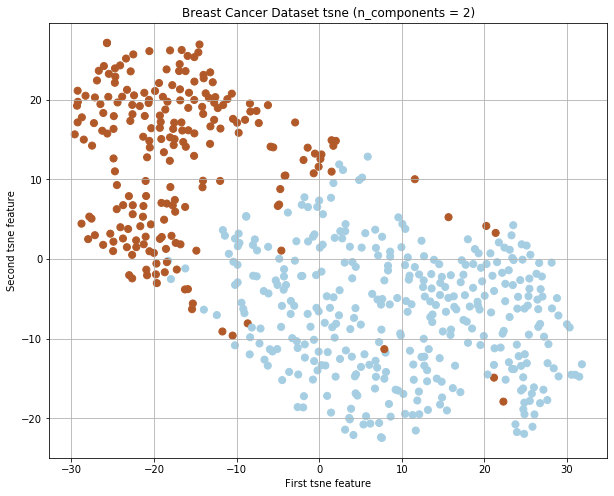

In [25]:
plt.figure(figsize=(10,8))
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y,cmap='Paired_r',s=50,marker='o')
plt.grid()
plt.xlabel('First tsne feature')
plt.ylabel('Second tsne feature')
plt.title('Breast Cancer Dataset tsne (n_components = 2)')
plt.show()

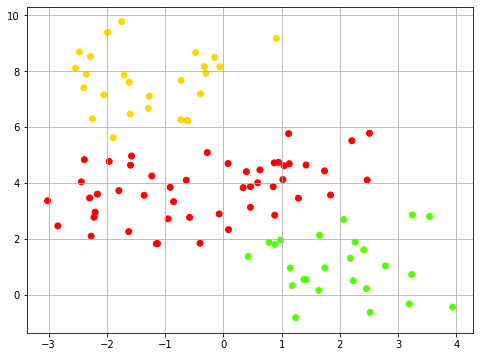

In [26]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X_blob,y_blob=make_blobs(n_samples=100,n_features=2,random_state=0,centers=4)
kmeans=KMeans(n_clusters=3)
kmeans.fit(X_blob)
# print(kmeans.predict(X_blob))
plt.figure(figsize=(8,6))
plt.grid()
plt.scatter(X_blob[:,0],X_blob[:,1],c=kmeans.predict(X_blob),cmap='prism')
plt.show()

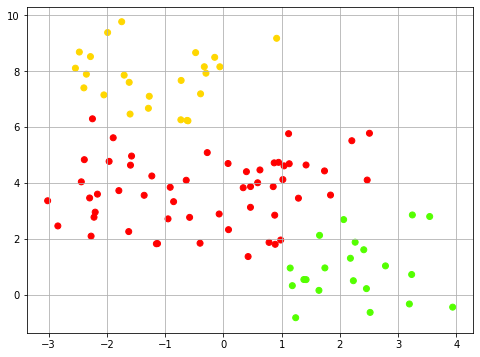

In [27]:
from sklearn.cluster import AgglomerativeClustering
ac=AgglomerativeClustering(n_clusters=3,linkage='ward')  # linkage{“ward”, “complete”, “average”, “single”}, default=”ward”
predict_ac=ac.fit_predict(X_blob) # agglomerativeclustering  have no predict method
plt.figure(figsize=(8,6))
plt.grid()
plt.scatter(X_blob[:,0],X_blob[:,1],c=predict_ac,cmap='prism')
plt.show()

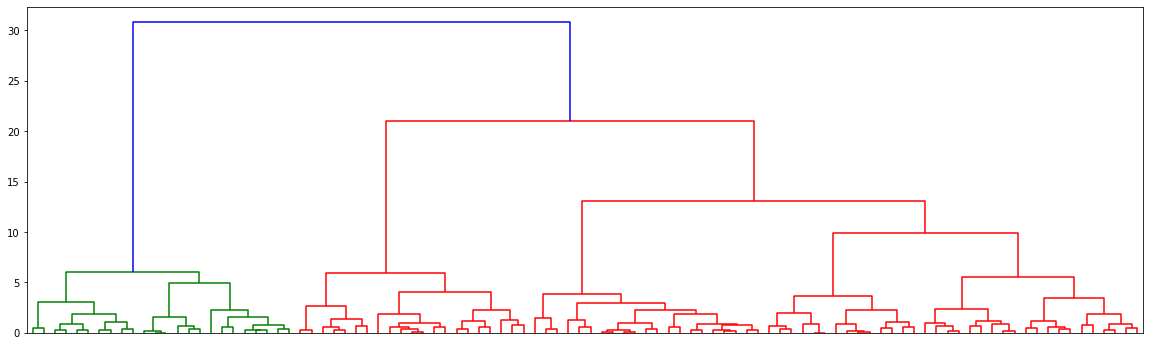

In [28]:
from scipy.cluster.hierarchy import ward,dendrogram
plt.figure(figsize=(20,6))
dendrogram(ward(X_blob))
plt.xticks([])
plt.show()

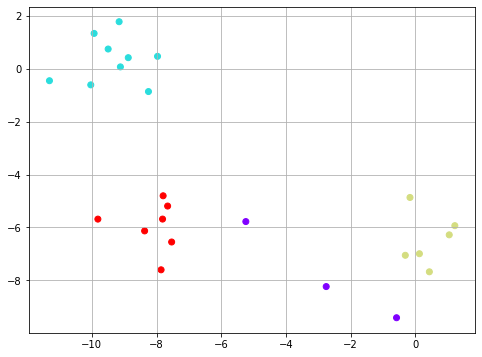

[ 0  1  0  2  0  0  0  2  2 -1  1  2  0  0 -1  0  0  1 -1  1  1  2  2  2
  1]


In [29]:
X_blob2, y_blob2 = make_blobs(random_state = 9, n_samples = 25)
from sklearn.cluster import  DBSCAN              # density based spatial clustering of application with noise
dbscan=DBSCAN(eps=2,min_samples=2)
pred_db=dbscan.fit_predict(X_blob2)
plt.figure(figsize=(8,6))
plt.grid()
plt.scatter(X_blob2[:,0],X_blob2[:,1],c=pred_db,cmap='rainbow')
plt.show()
print(pred_db)            # -1 is noise